List of contents:
1. Import libraries
2. Import file
3. Data derivation
4. Data privacy checks
5. Aggregate max, min, mean, mode
6. Create visualizations: bar and line

1. Import libraries

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

2. Import file

In [10]:
df_final = pd.read_pickle(r'C:\Users\court\Instacart Basket Analysis\02 Data\Prepared Data\orders_products_all.pkl')

In [3]:
# Create path
path = r'C:\Users\court\Instacart Basket Analysis'

In [4]:
path

'C:\\Users\\court\\Instacart Basket Analysis'

3. Data derivation

In [11]:
# Aggregate data based on income level
df_final.loc[df_final['income'] > 120000, 'income_level'] = 'High income'

In [12]:
df_final.loc[(df_final['income'] <= 120000) & (df_final['income'] > 40000), 'income_level'] = 'Middle income'

In [13]:
df_final.loc[df_final['income'] <= 40000, 'income_level'] = 'Low income'

In [14]:
# View frequency of income groups
df_final['income_level'].value_counts(dropna = False)

Middle income    6052861
High income      2751974
Low income        483633
Name: income_level, dtype: int64

4. Data privacy checks

In [16]:
# Remove columns containing PII data
df_final_data = df_final.drop(columns = ['state', 'age', 'income', 'number_of_dependants'])

In [17]:
# View column names
df_final_data.columns

Index(['user_id', 'gender', 'date_joined', 'family_status', 'product_id',
       'product_name', 'aisle_id', 'department_id', 'prices', 'order_id',
       'eval_set', 'order_number', 'orders_day_of_week', 'order_hour_of_day',
       'days_since_prior_order', 'add_to_cart_order', 'reordered', '_merge',
       'price_range_loc', 'busiest_day', 'busiest_day_loc',
       'busiest_period_of_day', 'max_order', 'loyalty_flag', 'mean_price',
       'spending_flag', 'median_days', 'frequency_flag', 'region', 'age_group',
       'household_size', 'unique_customers', 'income_level'],
      dtype='object')

5. Data aggregation

In [10]:
# Aggregate max, mean, min variable for certain columns
df_final_data.groupby('region').agg({'days_since_prior_order': ['mean', 'min', 'max']})

days_since_prior_order           
                            mean  min   max
region                                     
Midwest                10.898868  0.0  30.0
Northeast              10.774947  0.0  30.0
South                  10.801952  0.0  30.0
West                   10.755440  0.0  30.0

In [34]:
df_final_data.groupby('region').agg({'order_hour_of_day': ['mean', 'min', 'max']})

order_hour_of_day        
                       mean min max
region                             
Midwest           13.428484   0  23
Northeast         13.408493   0  23
South             13.406329   0  23
West              13.402428   0  23

In [41]:
df_final_data.groupby('region').agg({'prices': ['mean', 'min', 'max']})

prices              
                mean  min      max
region                            
Midwest    13.070207  1.0  99999.0
Northeast  11.519997  1.0  99999.0
South      12.223980  1.0  99999.0
West       10.861578  1.0  99999.0

In [80]:
# Aggregate mode
df_final_data.groupby('region').department_id.apply(lambda x: x.mode())

region      
Midwest    0    4
Northeast  0    4
South      0    4
West       0    4
Name: department_id, dtype: int64

In [77]:
df_final_data.groupby('region').product_name.apply(lambda x: x.mode())

region      
Midwest    0    Banana
Northeast  0    Banana
South      0    Banana
West       0    Banana
Name: product_name, dtype: object

In [34]:
df_final_data.groupby('loyalty_flag').agg({'order_hour_of_day': ['mean', 'min', 'max']})

order_hour_of_day        
                              mean min max
loyalty_flag                              
Loyal customer           13.189201   0  23
New customer             13.654742   0  23
Regular customer         13.480159   0  23

In [35]:
df_final_data.groupby('loyalty_flag').agg({'days_since_prior_order': ['mean', 'min', 'max']})

days_since_prior_order           
                                   mean  min   max
loyalty_flag                                      
Loyal customer                 6.024097  0.0  30.0
New customer                  17.598271  0.0  30.0
Regular customer              12.157787  0.0  30.0

In [42]:
df_final_data.groupby('loyalty_flag').agg({'prices': ['mean', 'min', 'max']})

prices              
                       mean  min      max
loyalty_flag                             
Loyal customer    10.504381  1.0  99999.0
New customer      12.734074  1.0  99999.0
Regular customer  12.604252  1.0  99999.0

In [25]:
df_final_data.groupby('loyalty_flag').product_name.apply(lambda x: x.mode())

loyalty_flag       
Loyal customer    0    Banana
New customer      0    Banana
Regular customer  0    Banana
Name: product_name, dtype: object

In [48]:
df_final_data.groupby('loyalty_flag').department_id.apply(lambda x: x.mode())

loyalty_flag       
Loyal customer    0    4
New customer      0    4
Regular customer  0    4
Name: department_id, dtype: int64

In [39]:
df_final_data.groupby('family_status').agg({'days_since_prior_order': ['mean', 'min', 'max']})

days_since_prior_order           
                                                   mean  min   max
family_status                                                     
divorced/widowed                              10.741947  0.0  30.0
living with parents and siblings              10.734290  0.0  30.0
married                                       10.820393  0.0  30.0
single                                        10.820767  0.0  30.0

In [40]:
df_final_data.groupby('family_status').agg({'order_hour_of_day': ['mean', 'min', 'max']})

order_hour_of_day        
                                              mean min max
family_status                                             
divorced/widowed                         13.433585   0  23
living with parents and siblings         13.401801   0  23
married                                  13.406760   0  23
single                                   13.417425   0  23

In [43]:
df_final_data.groupby('family_status').agg({'prices': ['mean', 'min', 'max']})

prices              
                                       mean  min      max
family_status                                            
divorced/widowed                  10.977896  1.0  99999.0
living with parents and siblings  10.244352  1.0  99999.0
married                           11.920840  1.0  99999.0
single                            12.933756  1.0  99999.0

In [37]:
df_final_data.groupby('family_status').product_name.apply(lambda x: x.mode())

family_status                      
divorced/widowed                  0    Banana
living with parents and siblings  0    Banana
married                           0    Banana
single                            0    Banana
Name: product_name, dtype: object

In [36]:
df_final_data.groupby('family_status').department_id.apply(lambda x: x.mode())

family_status                      
divorced/widowed                  0    4
living with parents and siblings  0    4
married                           0    4
single                            0    4
Name: department_id, dtype: int64

In [15]:
df_final_data.groupby('age_group').agg({'days_since_prior_order': ['mean', 'min', 'max']})

days_since_prior_order           
                                    mean  min   max
age_group                                          
Middle age adults              10.822938  0.0  30.0
Older adults                   10.790799  0.0  30.0
Young adults                   10.808991  0.0  30.0

In [13]:
df_final_data.groupby('age_group').agg({'order_hour_of_day': ['mean', 'min', 'max']})

order_hour_of_day        
                               mean min max
age_group                                  
Middle age adults         13.415854   0  23
Older adults              13.415214   0  23
Young adults              13.401003   0  23

In [44]:
df_final_data.groupby('age_group').agg({'prices': ['mean', 'min', 'max']})

prices              
                        mean  min      max
age_group                                 
Middle age adults  11.991703  1.0  99999.0
Older adults       11.747564  1.0  99999.0
Young adults       11.990532  1.0  99999.0

In [76]:
df_final_data.groupby('age_group').product_name.apply(lambda x: x.mode())

age_group           
Middle age adults  0    Banana
Older adults       0    Banana
Young adults       0    Banana
Name: product_name, dtype: object

In [82]:
df_final_data.groupby('age_group').department_id.apply(lambda x: x.mode())

age_group           
Middle age adults  0    4
Older adults       0    4
Young adults       0    4
Name: department_id, dtype: int64

In [21]:
df_final_data.groupby('unique_customers').agg({'days_since_prior_order': ['mean', 'min', 'max']})

days_since_prior_order           
                                      mean  min   max
unique_customers                                     
Couple with no kids              10.816315  0.0  30.0
Older parents                    10.835869  0.0  30.0
Other                            10.629701  0.0  30.0
Other single adult               10.741947  0.0  30.0
Single adult                     10.820767  0.0  30.0
Younger parents                  10.799962  0.0  30.0

In [14]:
df_final_data.groupby('unique_customers').agg({'order_hour_of_day': ['mean', 'min', 'max']})

order_hour_of_day        
                                 mean min max
unique_customers                             
Couple with no kids         13.388681   0  23
Older parents               13.416501   0  23
Other                       13.369636   0  23
Other single adult          13.433585   0  23
Single adult                13.417425   0  23
Younger parents             13.416845   0  23

In [45]:
df_final_data.groupby('unique_customers').agg({'prices': ['mean', 'min', 'max']})

prices              
                          mean  min      max
unique_customers                            
Couple with no kids  11.279159  1.0  99999.0
Older parents        11.915623  1.0  99999.0
Other                10.386278  1.0  14900.0
Other single adult   10.977896  1.0  99999.0
Single adult         12.933756  1.0  99999.0
Younger parents      12.544451  1.0  99999.0

In [75]:
df_final_data.groupby('unique_customers').product_name.apply(lambda x: x.mode())

unique_customers      
Couple with no kids  0    Banana
Older parents        0    Banana
Other                0    Banana
Other single adult   0    Banana
Single adult         0    Banana
Younger parents      0    Banana
Name: product_name, dtype: object

In [83]:
df_final_data.groupby('unique_customers').department_id.apply(lambda x: x.mode())

unique_customers      
Couple with no kids  0    4
Older parents        0    4
Other                0    4
Other single adult   0    4
Single adult         0    4
Younger parents      0    4
Name: department_id, dtype: int64

In [13]:
df_final_data.groupby('income_level').agg({'days_since_prior_order': ['mean', 'min', 'max']})

days_since_prior_order           
                                mean  min   max
income_level                                   
High income                10.758071  0.0  30.0
Low income                 11.283590  0.0  30.0
Middle income              10.795412  0.0  30.0

In [15]:
df_final_data.groupby('income_level').agg({'order_hour_of_day': ['mean', 'min', 'max']})

order_hour_of_day        
                           mean min max
income_level                           
High income           13.454629   0  23
Low income            13.172980   0  23
Middle income         13.409519   0  23

In [46]:
df_final_data.groupby('income_level').agg({'prices': ['mean', 'min', 'max']})

prices              
                    mean  min      max
income_level                          
High income    20.189847  1.0  99999.0
Low income      6.510492  1.0     25.0
Middle income   8.602570  1.0  99999.0

In [17]:
df_final_data.groupby('income_level').product_name.apply(lambda x: x.mode())

income_level    
High income    0                    Banana
Low income     0    Bag of Organic Bananas
Middle income  0                    Banana
Name: product_name, dtype: object

In [81]:
df_final_data.groupby('income_level').department_id.apply(lambda x: x.mode())

income_level    
High income    0    4
Low income     0    4
Middle income  0    4
Name: department_id, dtype: int64

6. Visualizations

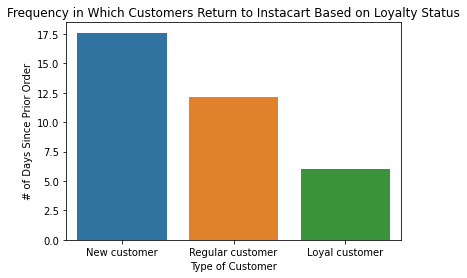

In [20]:
# Create bar chart
bar_1 = sns.barplot(x="loyalty_flag", y="days_since_prior_order", data=df_final_data).set(title="Frequency in Which Customers Return to Instacart Based on Loyalty Status", xlabel="Type of Customer", ylabel="# of Days Since Prior Order")

In [25]:
# Export graph
bar_1.savefig(os.path.join(path, '04 Analysis','Visualizations', 'loyalty_frequency.png'))

AttributeError: 'list' object has no attribute 'savefig'

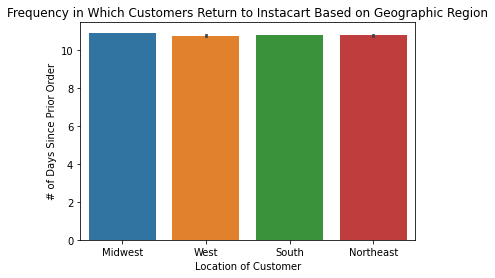

In [23]:
bar_2 = sns.barplot(x="region", y="days_since_prior_order", data=df_final_data).set(title="Frequency in Which Customers Return to Instacart Based on Geographic Region", xlabel="Location of Customer", ylabel="# of Days Since Prior Order")

In [53]:
bar_2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'region_frequency.png'))

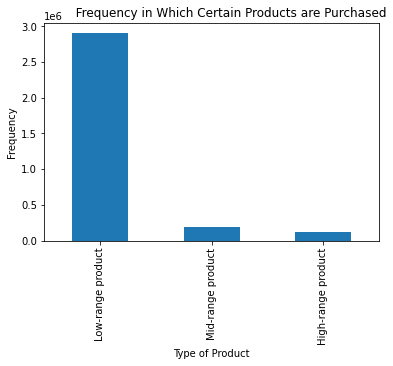

In [28]:
bar_3 = df_final_data['price_range_loc'].value_counts().plot.bar().set(title="          Frequency in Which Certain Products are Purchased", xlabel="Type of Product", ylabel="Frequency")

In [55]:
bar_3.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'product_frequency.png'))

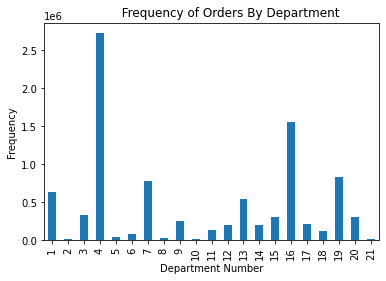

In [31]:
bar_4 = df_final_data['department_id'].value_counts().sort_index().plot.bar().set(title="          Frequency of Orders By Department", xlabel="Department Number", ylabel="Frequency")

In [57]:
bar_4.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'department_frequency.png'))

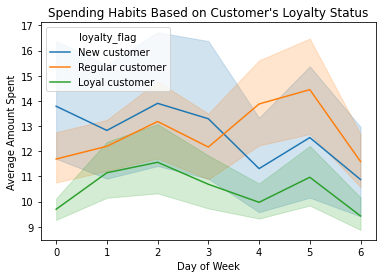

In [34]:
# Create line graph
line_1 = sns.lineplot(x="orders_day_of_week", y="prices", hue="loyalty_flag", data=df_final_data).set(title="Spending Habits Based on Customer's Loyalty Status", xlabel="Day of Week", ylabel="Average Amount Spent")

In [59]:
# Export line graph
line_1.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'loyalty_ordering.png'))

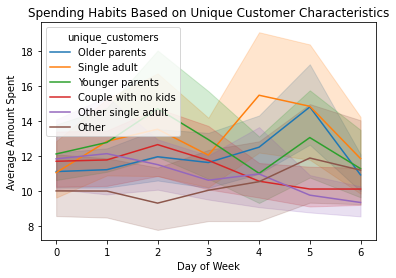

In [35]:
line_2 = sns.lineplot(y="prices", x="orders_day_of_week", hue='unique_customers', data=df_final_data).set(title="Spending Habits Based on Unique Customer Characteristics", xlabel="Day of Week", ylabel="Average Amount Spent")

In [61]:
line_2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'unique_ordering.png'))

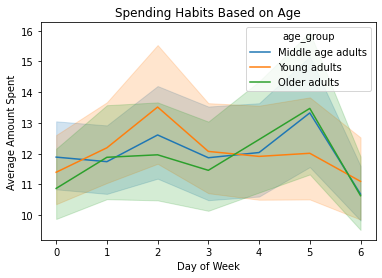

In [36]:
line_3 = sns.lineplot(x="orders_day_of_week", y="prices", hue='age_group', data=df_final_data).set(title="Spending Habits Based on Age", xlabel="Day of Week", ylabel="Average Amount Spent")

In [63]:
line_3.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'age_ordering.png'))

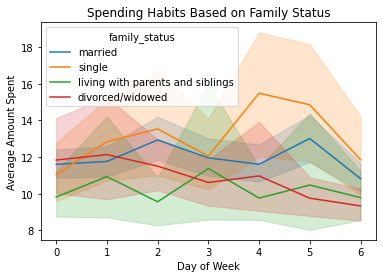

In [37]:
line_4 = sns.lineplot(x="orders_day_of_week", y="prices", hue='family_status', data=df_final_data).set(title="Spending Habits Based on Family Status", xlabel="Day of Week", ylabel="Average Amount Spent")

In [65]:
line_4.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'family_ordering.png'))

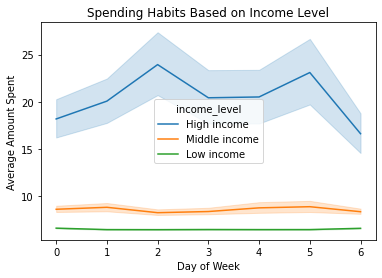

In [38]:
line_5 = sns.lineplot(x="orders_day_of_week", y="prices", hue='income_level', data=df_final_data).set(title="Spending Habits Based on Income Level", xlabel="Day of Week", ylabel="Average Amount Spent")

In [67]:
line_5.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'income_ordering.png'))

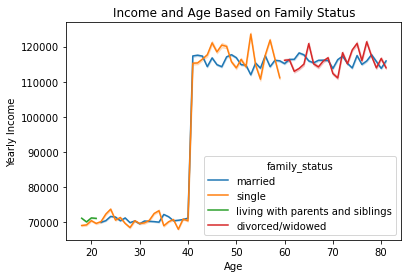

In [39]:
line_7 = sns.lineplot(x="age", y="income", hue="family_status", data=df_final).set(title="Income and Age Based on Family Status", xlabel="Age", ylabel="Yearly Income")

In [69]:
line_7.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'demographics.png'))

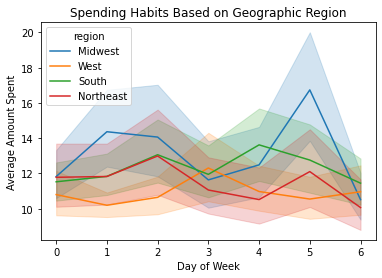

In [40]:
line_8 = sns.lineplot(x="orders_day_of_week", y="prices", hue='region', data=df_final_data).set(title="Spending Habits Based on Geographic Region", xlabel="Day of Week", ylabel="Average Amount Spent")

In [71]:
line_8.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'region_ordering.png'))